In [1]:
import numpy as np
import tensorflow as tf
import random
from tensorflow import keras
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer 
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageChops, ImageOps
from sklearn.model_selection import train_test_split

In [2]:
img_size_x = 50
img_size_y = 50

In [3]:
def get_img(path):
    test_img = Image.open(path)
#     test_img = test_img.convert('L')
    test_img = test_img.resize((img_size_x, img_size_y)) 
    test_x = np.array(test_img, np.float32)
    test_x = test_x / 255.0
    return test_x

In [4]:
path = 'D:/Лабы 3 курс/МНСиРО/Lab4/data'
folder_list = ['matchstick', 'pencil', 'other']

In [5]:
# считывание данных
x_full = []
y_full = []
for folder in folder_list:
    file_list = os.listdir(path + '/' + folder)
    for file in file_list:
        x_full.append(get_img(path + '/' + folder + '/' + file))
        if folder == 'matchstick':
            y_full.append(0)
        elif folder == 'pencil':
            y_full.append(1)
        else:
            y_full.append(2)
            
print(x_full[0])

[[[0.5921569  0.65882355 0.76862746]
  [0.59607846 0.6627451  0.7764706 ]
  [0.6        0.6666667  0.78039217]
  ...
  [0.627451   0.67058825 0.7882353 ]
  [0.61960787 0.6627451  0.78039217]
  [0.6156863  0.65882355 0.7764706 ]]

 [[0.6039216  0.6666667  0.7764706 ]
  [0.60784316 0.67058825 0.78431374]
  [0.60784316 0.6745098  0.78431374]
  ...
  [0.6313726  0.6745098  0.7921569 ]
  [0.62352943 0.6666667  0.78431374]
  [0.62352943 0.6666667  0.78431374]]

 [[0.6039216  0.6745098  0.76862746]
  [0.60784316 0.6745098  0.78039217]
  [0.60784316 0.6745098  0.78431374]
  ...
  [0.6313726  0.6745098  0.7921569 ]
  [0.62352943 0.6666667  0.78431374]
  [0.62352943 0.6666667  0.78431374]]

 ...

 [[0.68235296 0.5686275  0.30588236]
  [0.627451   0.45490196 0.23137255]
  [0.7529412  0.627451   0.41960785]
  ...
  [0.7647059  0.59607846 0.34509805]
  [0.72156864 0.5686275  0.2784314 ]
  [0.37254903 0.21568628 0.04313726]]

 [[0.6117647  0.47058824 0.23921569]
  [0.53333336 0.38431373 0.19607843]


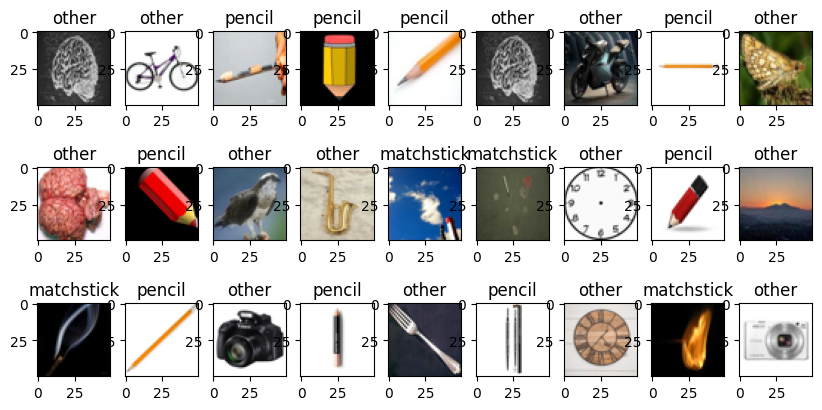

In [6]:
plt.figure(figsize=(10,5))
for i in range(27):
    plt.subplot(3,9,i + 1)
    item = random.randint(0, len(x_full) - 1)
    plt.imshow(x_full[item])
    plt.title(['matchstick', 'pencil', 'other'][y_full[item]])

In [7]:
x_full = np.array(x_full, np.float32)
y_full = np.array(y_full, np.float32)

In [8]:
n_classes = 3
y_full_cat = keras.utils.to_categorical(y_full, n_classes)
print(y_full_cat[:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [9]:
n_classes = 3
num_featres = img_size_x * img_size_y

n_hidden_1 = 1500
n_hidden_2 = 100
n_hidden_3 = 50

In [10]:
(x_train, x_test, y_train, y_test) = train_test_split(x_full, 
                                                      y_full_cat, test_size=0.2, random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(747, 50, 50, 3)
(187, 50, 50, 3)
(747, 3)
(187, 3)


In [12]:
model = Sequential([
    Conv2D(64, (7, 7), padding = 'same', activation = 'relu', input_shape = (img_size_x, img_size_y, 3)),
    MaxPooling2D((3, 3), strides = 2),
    Conv2D(256, (5, 5), padding = 'same', activation = 'relu'),
    MaxPooling2D((3, 3), strides = 2),
    Conv2D(384, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((3, 3), strides = 2),
    Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((3, 3), strides = 2),
    Flatten(),
    Dense(384, activation = 'sigmoid'),
    Dense(n_classes, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       409856    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 384)       885120    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 384)        0

In [13]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss='MSE', optimizer=optimizer, metrics = ['accuracy'])
print(y_train.shape)

(747, 3)


In [14]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
5/5 [==============================] - 16s 3s/step - loss: 0.2239 - accuracy: 0.4271 - val_loss: 0.2245 - val_accuracy: 0.3867
Epoch 2/50
5/5 [==============================] - 17s 3s/step - loss: 0.2086 - accuracy: 0.4807 - val_loss: 0.2070 - val_accuracy: 0.4733
Epoch 3/50
5/5 [==============================] - 17s 3s/step - loss: 0.1902 - accuracy: 0.5695 - val_loss: 0.1863 - val_accuracy: 0.5800
Epoch 4/50
5/5 [==============================] - 17s 3s/step - loss: 0.1732 - accuracy: 0.6382 - val_loss: 0.1714 - val_accuracy: 0.6200
Epoch 5/50
5/5 [==============================] - 17s 3s/step - loss: 0.1597 - accuracy: 0.6600 - val_loss: 0.1576 - val_accuracy: 0.6800
Epoch 6/50
5/5 [==============================] - 16s 3s/step - loss: 0.1573 - accuracy: 0.6633 - val_loss: 0.1511 - val_accuracy: 0.6667
Epoch 7/50
5/5 [==============================] - 16s 3s/step - loss: 0.1486 - accuracy: 0.6851 - val_loss: 0.1705 - val_accuracy: 0.6533
Epoch 8/50
5/5 [==================

In [15]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 1s 213ms/step - loss: 0.1343 - accuracy: 0.7273


[0.13427573442459106, 0.7272727489471436]

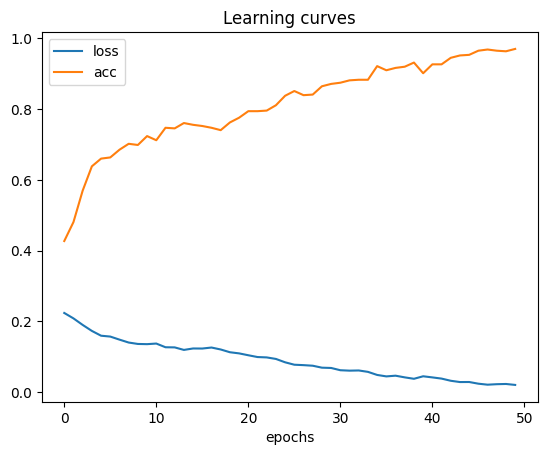

In [20]:
plt.title('Learning curves')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [18]:
test_imgs = x_test[:30]
preds = model.predict(test_imgs)
print(preds)

1/1 [==============================] - 0s 279ms/step
[[9.70127899e-03 9.52396989e-01 3.79017144e-02]
 [7.89510787e-01 6.29595295e-02 1.47529751e-01]
 [9.99987245e-01 9.29106318e-06 3.50319306e-06]
 [5.02163768e-02 1.07131787e-02 9.39070404e-01]
 [8.09761524e-01 1.51226204e-02 1.75115809e-01]
 [2.77389497e-01 1.03348522e-02 7.12275624e-01]
 [2.85675726e-03 8.23242545e-01 1.73900604e-01]
 [7.30865479e-01 1.03815820e-03 2.68096358e-01]
 [9.86830518e-03 2.25261203e-03 9.87879097e-01]
 [9.76820849e-03 9.51744556e-01 3.84872146e-02]
 [6.72203663e-04 5.37243359e-05 9.99274075e-01]
 [1.51941236e-02 8.82795513e-01 1.02010429e-01]
 [1.01741701e-02 1.95999369e-02 9.70225871e-01]
 [8.49945024e-02 8.78829420e-01 3.61761153e-02]
 [9.58366871e-01 1.57289323e-03 4.00602110e-02]
 [1.64619572e-02 5.59511175e-03 9.77942944e-01]
 [1.84190020e-01 6.13108516e-01 2.02701479e-01]
 [6.06801244e-04 2.63732829e-04 9.99129474e-01]
 [3.41223218e-02 1.92665160e-01 7.73212492e-01]
 [9.99984741e-01 1.47583851e-05 4.4

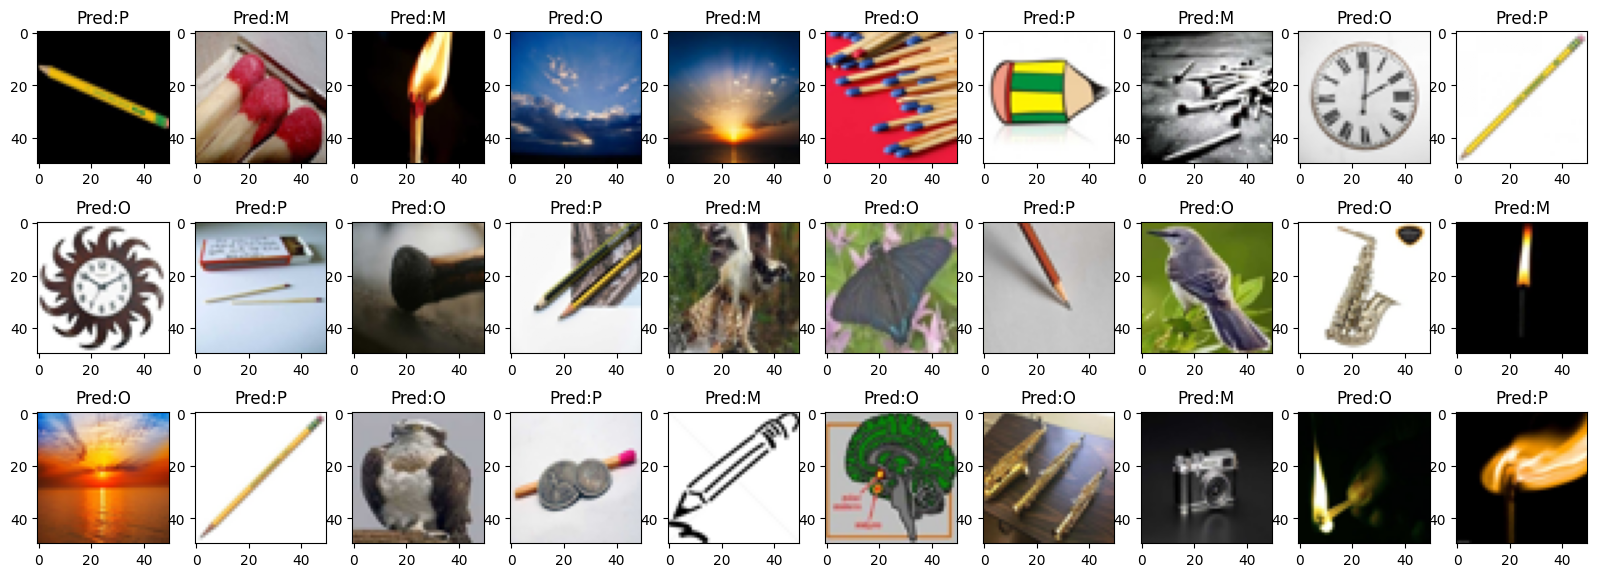

In [19]:
plt.figure(figsize=(20,7))
for i in range(len(test_imgs)):
    plt.subplot(3,10,i + 1)
    plt.imshow(test_imgs[i])
    plt.title(['Pred:M', 'Pred:P', 'Pred:O'][np.argmax(preds[i])])